# Housing in London Database


#### Data Provided by London Datastore  available at https://www.kaggle.com/justinas/housing-in-london & https://data.london.gov.uk/dataset

### ShawnTew Z5306311




### The dataset of London Boroughs from 1999-2018 consists of:
- Mean Salary
- Median Salary
- Life Satisfaction
- Percent of Households that recycle
- Population Size
- Number of Jobs
- Borough Area Size 
### Any trends or correlations in the data between the years
### *This dataset also includes selected regions of the UK to compare with boroughs in London*

In [102]:
import os
import os.path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use("seaborn-darkgrid")
saved_style_state = matplotlib.rcParams.copy()


In [103]:
#Sample of the dataset
hdf = pd.read_csv("housing_in_london_yearly_variables (version 1).csv")
hdf.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000002,barking and dagenham,01/12/1999,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,01/12/2000,22618.0,NaN,24696,4,163893.0,57000.0,NaN,NaN,1
2,E09000002,barking and dagenham,01/12/2001,22323.0,NaN,26050,3,165654.0,54000.0,3780.0,68298.0,1
3,E09000002,barking and dagenham,01/12/2002,24813.0,NaN,26653,3,166357.0,52000.0,3780.0,68526.0,1
4,E09000002,barking and dagenham,01/12/2003,25358.0,NaN,27792,5,166210.0,55000.0,3780.0,68837.0,1


### Boroughs in London
- There are 32 Boroughs in London excluding 'City of London' 
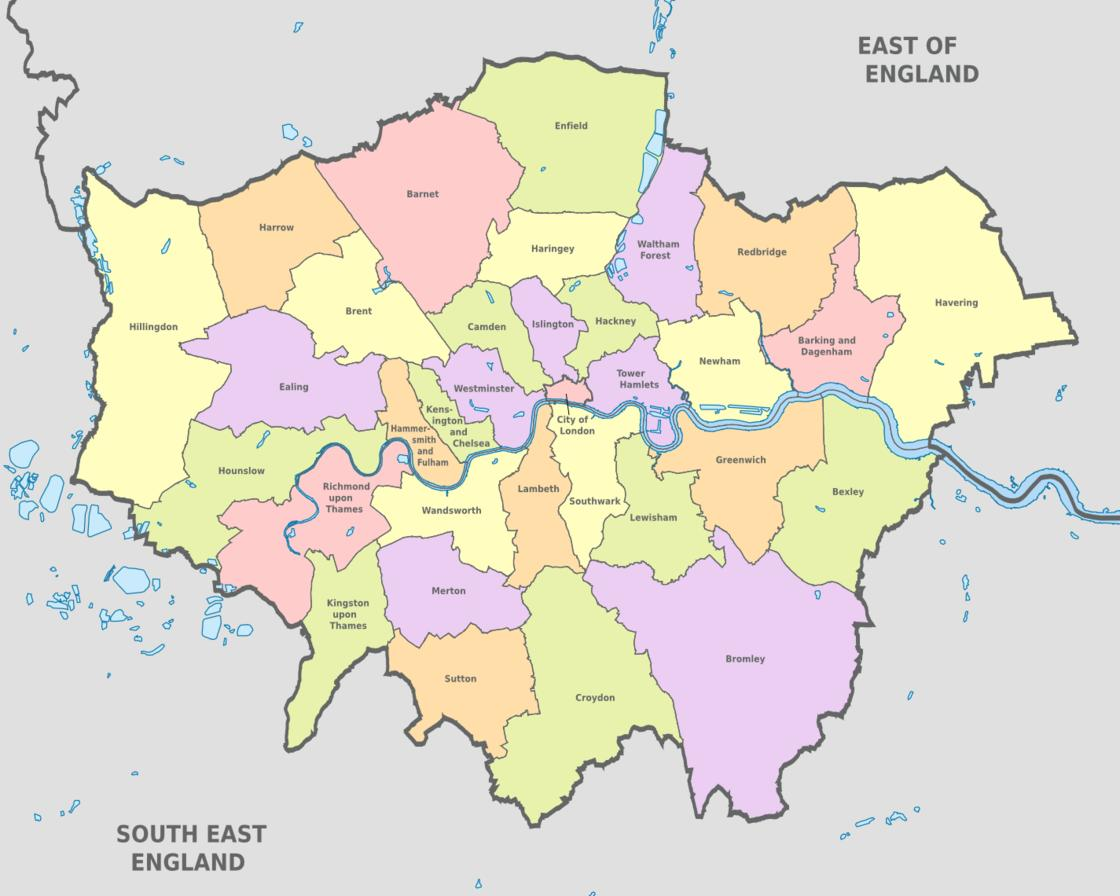


In [117]:
def cast_to_number(value):
    try:
        return pd.to_numeric(value);
    except Exception as e:
        print(value, e);
        
hdf["recycling_pct"] = hdf["recycling_pct"].apply(cast_to_number)
hdf["mean_salary"] = hdf["mean_salary"].apply(cast_to_number)
hdf["median_salary"] = hdf["median_salary"].apply(cast_to_number)


In [106]:
#Labelling Years in the Dataset
year99 = hdf[["1999" in x for x in hdf.date]]
year2000 = hdf[["2000" in x for x in hdf.date]]
year2001 = hdf[["2001" in x for x in hdf.date]]
year2002 = hdf[["2002" in x for x in hdf.date]]
year2003 = hdf[["2003" in x for x in hdf.date]]
year2004 = hdf[["2004" in x for x in hdf.date]]
year2005 = hdf[["2005" in x for x in hdf.date]]
year2006 = hdf[["2006" in x for x in hdf.date]]
year2007 = hdf[["2007" in x for x in hdf.date]]
year2008 = hdf[["2008" in x for x in hdf.date]]
year2009 = hdf[["2009" in x for x in hdf.date]]
year2010 = hdf[["2010" in x for x in hdf.date]]
year2011 = hdf[["2011" in x for x in hdf.date]]
year2012 = hdf[["2012" in x for x in hdf.date]]
year2013 = hdf[["2013" in x for x in hdf.date]]
year2014 = hdf[["2014" in x for x in hdf.date]]
year2015 = hdf[["2015" in x for x in hdf.date]]
year2016 = hdf[["2016" in x for x in hdf.date]]
year2017 = hdf[["2017" in x for x in hdf.date]]
year2018 = hdf[["2018" in x for x in hdf.date]]
year2019 = hdf[["2019" in x for x in hdf.date]]

In [107]:
def populationsize():
    smallhdf = hdf[hdf.population_size < 400000 ]
    small18 = year2018[year2018.population_size < 400000 ]
    smallhdf.plot(kind='scatter', x ='area', y='population_size', color = "#2E856E")
    pslocation = np.arange(len(small18.population_size))
    plt.xticks(ticks=pslocation, labels=small18.area, rotation = "vertical");
    plt.xlabel('Boroughs', fontweight='bold', fontsize=22)
    plt.ylabel('Population Size', fontweight='bold', fontsize=22)
    plt.title("Population Size of Different Boroughs in London",fontsize=26,  family = 'monospace');
    return plt.show()

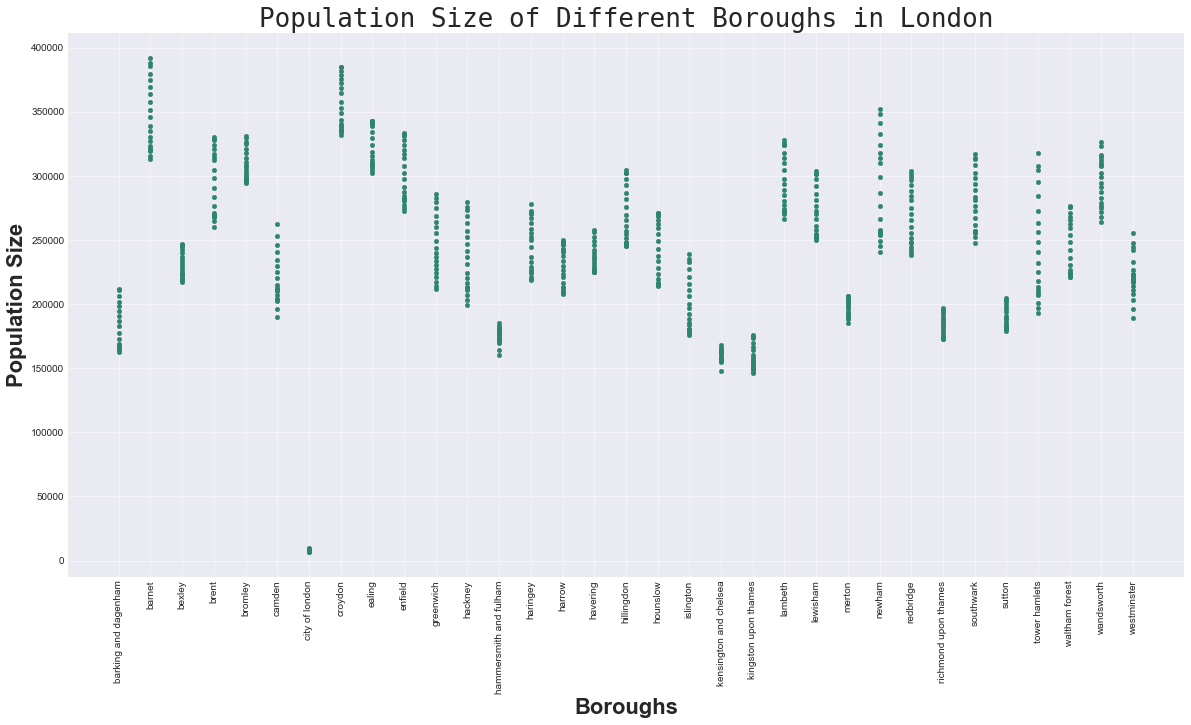

In [108]:
populationsize()

- The dataset shows that population size increases every year in each borough.
-  Each Borough has a population size between 150,000 to 400,000 except the city of London which currently holds approximately only 9,000 people.
- The current most populated borough is barnet with 392140 in 2018.
- The borough with the highest increase of population size in 19 years is Tower hamlets with 124000.
- City of London has had the lowest amount of growth with a measly 2000 increase in population. 


In [109]:
def mediansalary_recycling():
    fig = plt.figure() # Create matplotlib figure
    ax = fig.add_subplot() # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.3
    year2018.median_salary.plot(kind='bar', color='#5CA083', ax=ax, width=width, position=1, label = "Median Salary")
    year2018.recycling_pct.plot(kind='bar', color='#2E856E', ax=ax2, width=width, position=0, label = "Recycling Percentage")
    fig.legend()
    mdlocation = np.arange(len(year99.median_salary))
    plt.xticks(ticks=mdlocation, labels=year99.area, rotation = "vertical")
    plt.title("Median Salary and Percentage of Households that recycle in different boroughs of London 2018",fontsize=26,  family = 'monospace')
    ax.set_ylabel('Median Salary',fontweight='bold', fontsize=22)
    ax2.set_ylabel('Recycling Percentage',fontweight='bold', fontsize=22)
    ax.set_xlabel('Boroughs',fontweight='bold', fontsize=22)
    return plt.show()

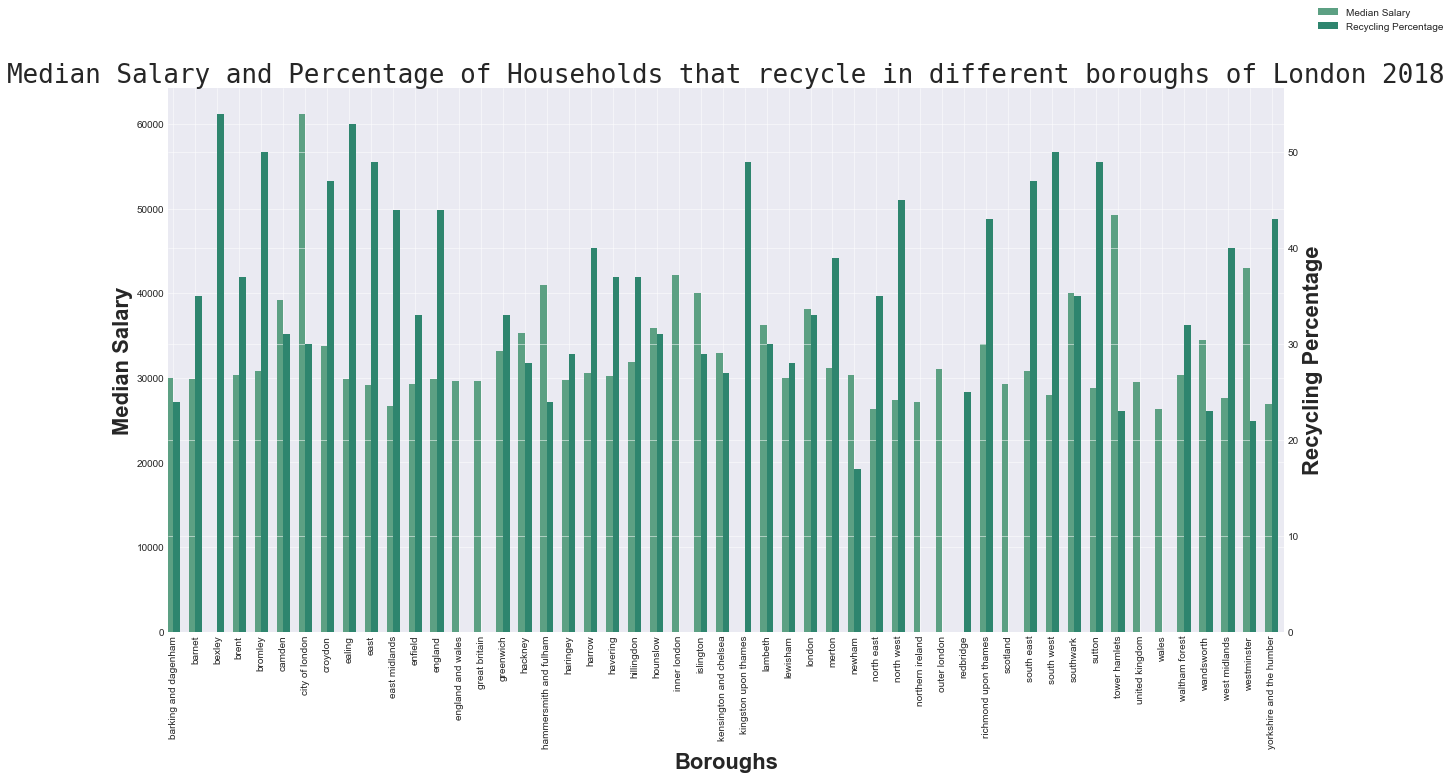

In [110]:
mediansalary_recycling()

- Surpringly, no real correlation between median salary and percentage of households that reycle. 

In [120]:
def meansalaryoveryears():
    plt.scatter(hdf.area, hdf.mean_salary, color = "#2E856E", label = "Mean Salary")
    plt.legend()
    mslocation = np.arange(len(year99.mean_salary))
    plt.title("Mean Salary in London over 19 years",fontsize=26,  family = 'monospace')
    plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical");
    plt.xlabel('Boroughs', fontweight='bold', fontsize=22)
    plt.ylabel('Mean Salary', fontweight='bold', fontsize=22);
    return plt.show()

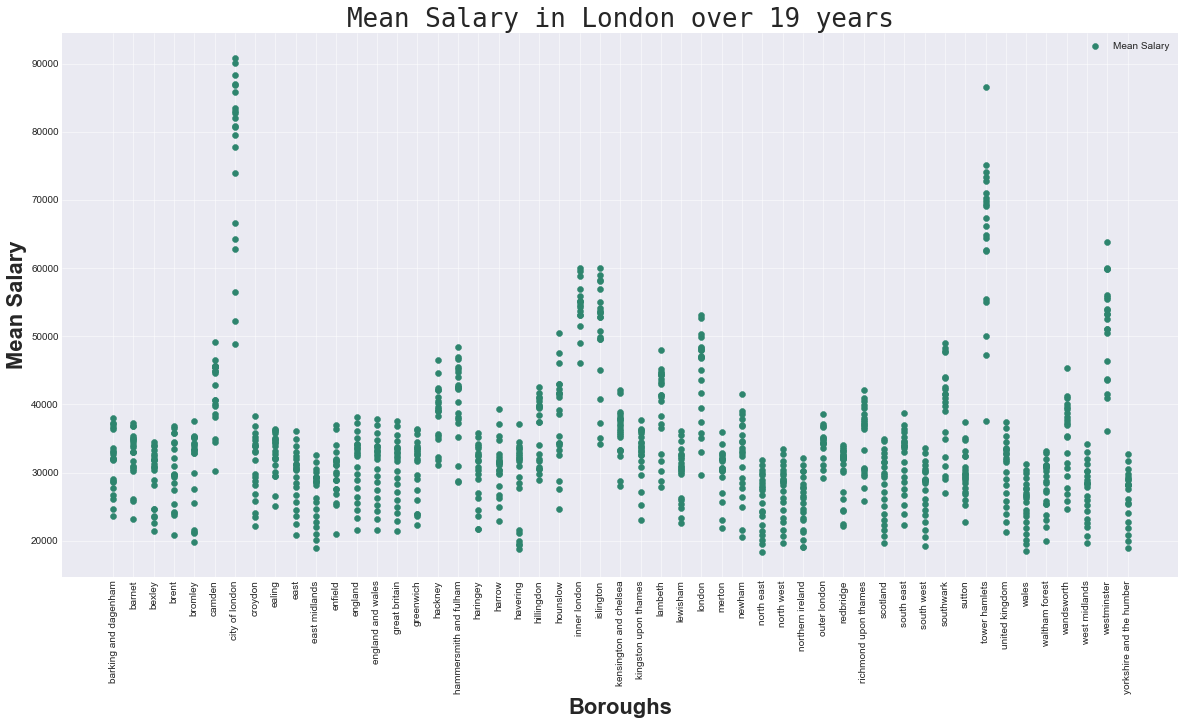

In [121]:
meansalaryoveryears()

- Mean Salary has increased overtime in every Borough.
- Borough with the current highest mean salary is City of London at £89,000
- The borough with the current lowest mean salary is Bexley with £34,000
- The borough with the highest increase in mean salary over the 19 years is also city of london.  
- The borough with the smallest increase is Hillingdon.


In [127]:
def lifesatisfactiongraph():
    ax = sns.boxplot(x='area', y='life_satisfaction', data=hdf, color ='#5CA083')
    plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical");
    plt.xlabel('Boroughs', fontweight='bold', fontsize=22)
    plt.ylabel('Life Satisfaction', fontweight='bold', fontsize=22)
    plt.title("Life Satisfaction in London",fontsize=26,  family = 'monospace');
    return plt.show()

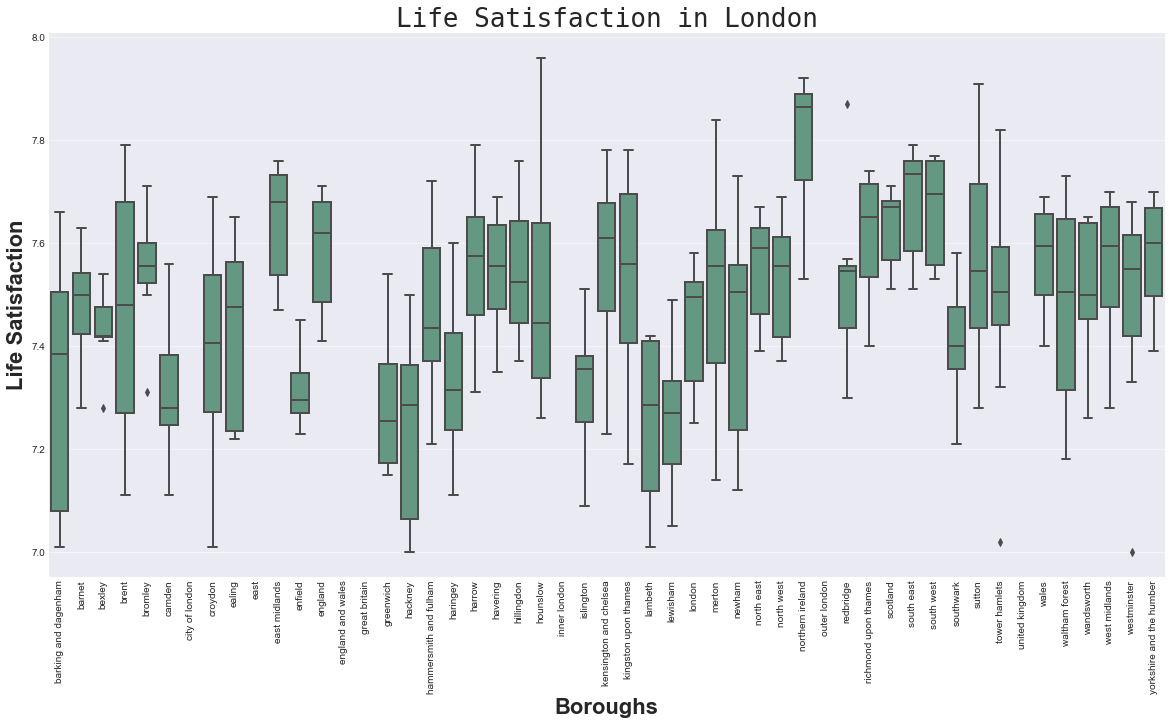

In [128]:
lifesatisfactiongraph()

- Generally life satisfaction is pretty good with eveyrthing ranging between 7-8 out of 10.

In [113]:
def populationsizevsjobs2000():
    small2000 = year2000[year2000.population_size < 400000 ]
    fig = plt.figure() 

    ax = fig.add_subplot() 
    ax2 = ax.twinx() 

    width = 0.3

    small2000.population_size.plot(kind='bar', color='#5CA083', ax=ax, width=width, position=1,label = "population_size")
    small2000.number_of_jobs.plot(kind='bar', color='#2E856E', ax=ax2, width=width, position=0, label = "number_of_jobs")
    fig.legend()
    nojlocation = np.arange(len(small2000.number_of_jobs))
    plt.xticks(ticks=nojlocation, labels=small2000.area, rotation = "vertical")
    plt.title("Population size vs number of jobs in 2000",fontsize=26,  family = 'monospace')

    ax.set_ylabel('Population Size', fontweight='bold', fontsize=22)
    ax2.set_ylabel('Number of Jobs', fontweight='bold', fontsize=22)
    ax.set_xlabel('Boroughs',fontweight='bold', fontsize=22)
    return plt.show()

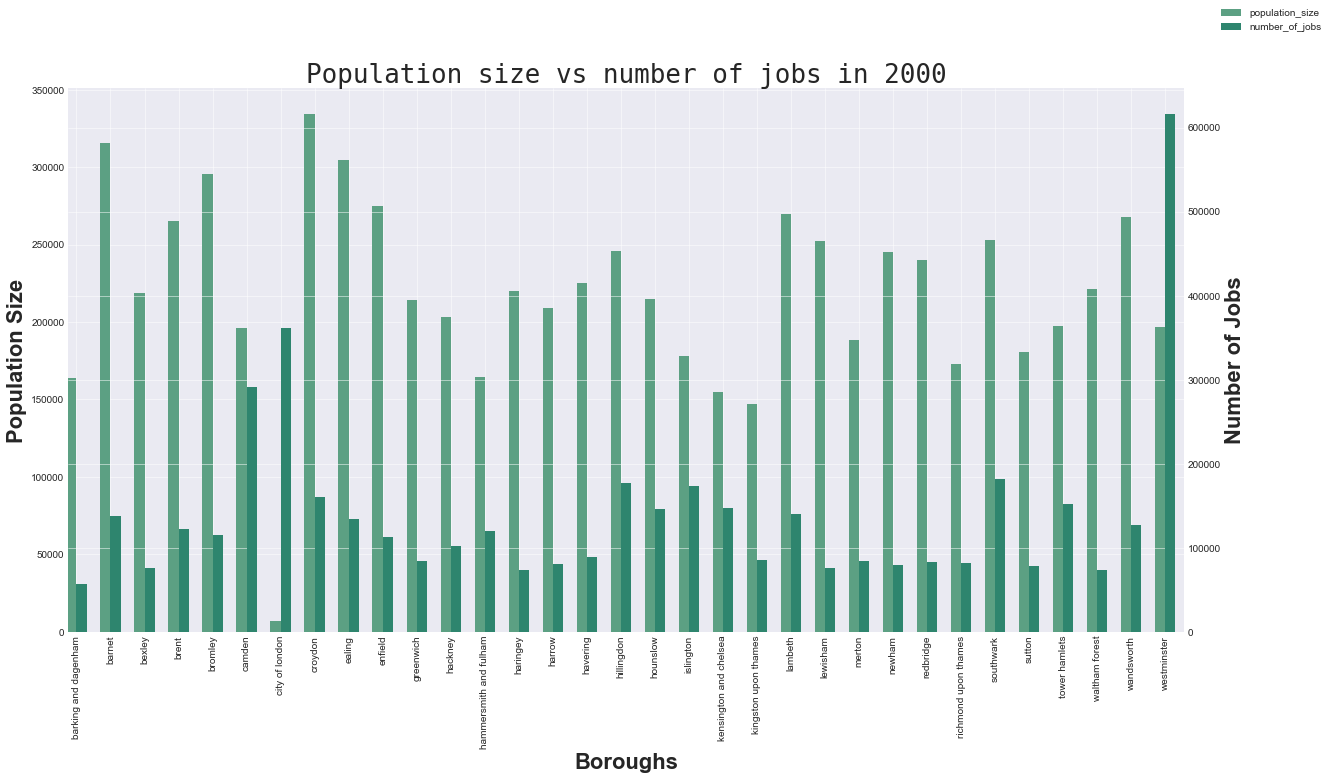

In [114]:
populationsizevsjobs2000()

In [123]:
def populationsizevsjobs2018():    
    small18 = year2018[year2018.population_size < 400000 ]
    fig = plt.figure() # Create matplotlib figure

    ax = fig.add_subplot() # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    width = 0.3
    
    small18.population_size.plot(kind='bar', color='#5CA083', ax=ax, width=width, position=1,label = "population_size")
    small18.number_of_jobs.plot(kind='bar', color='#2E856E', ax=ax2, width=width, position=0, label = "number_of_jobs")
    fig.legend()
    nojlocation = np.arange(len(small18.number_of_jobs))
    plt.xticks(ticks=nojlocation, labels=small18.area, rotation = "vertical")
    plt.title("Population size vs number of jobs in 2018", fontsize=26,  family = 'monospace')

    ax.set_ylabel('Population Size', fontweight='bold', fontsize=22)
    ax2.set_ylabel('Number of Jobs', fontweight='bold', fontsize=22)
    ax.set_xlabel('Boroughs',fontweight='bold', fontsize=22)

    return plt.show()

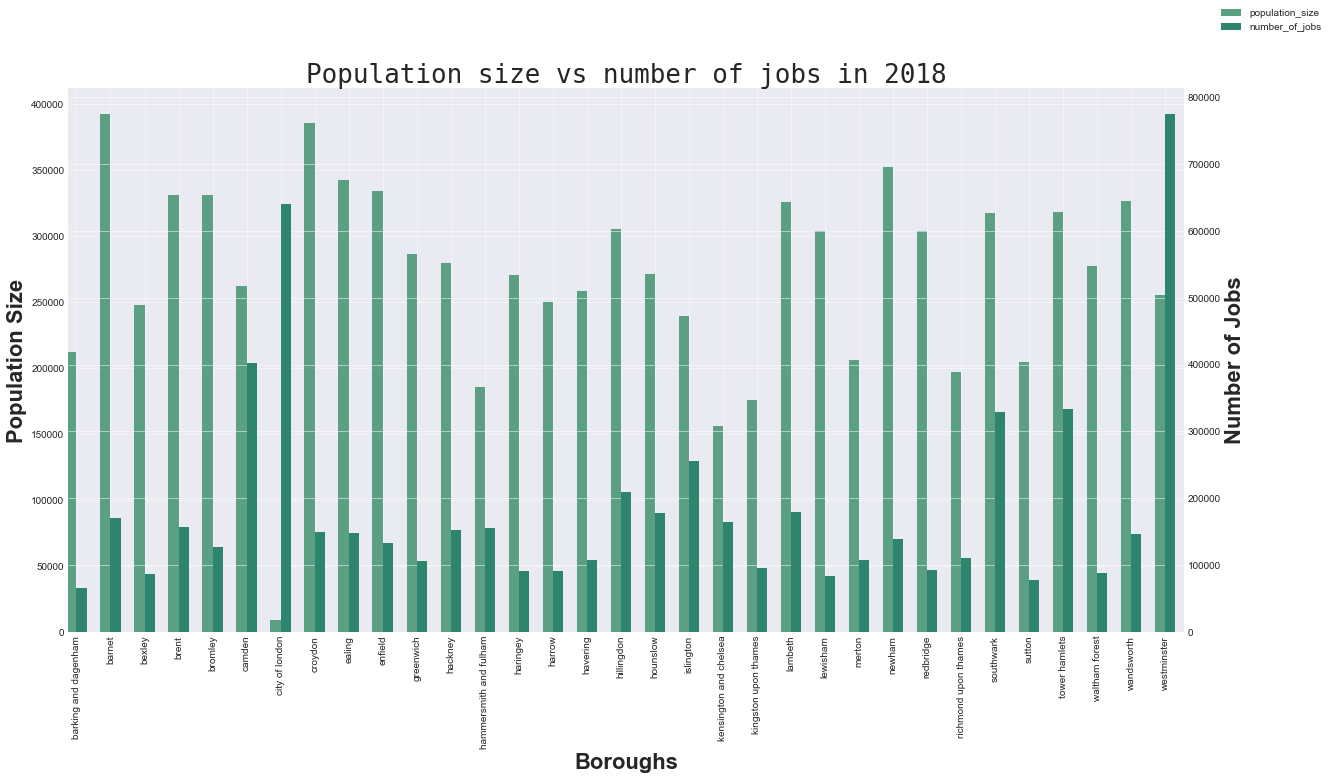

In [124]:
populationsizevsjobs2018()

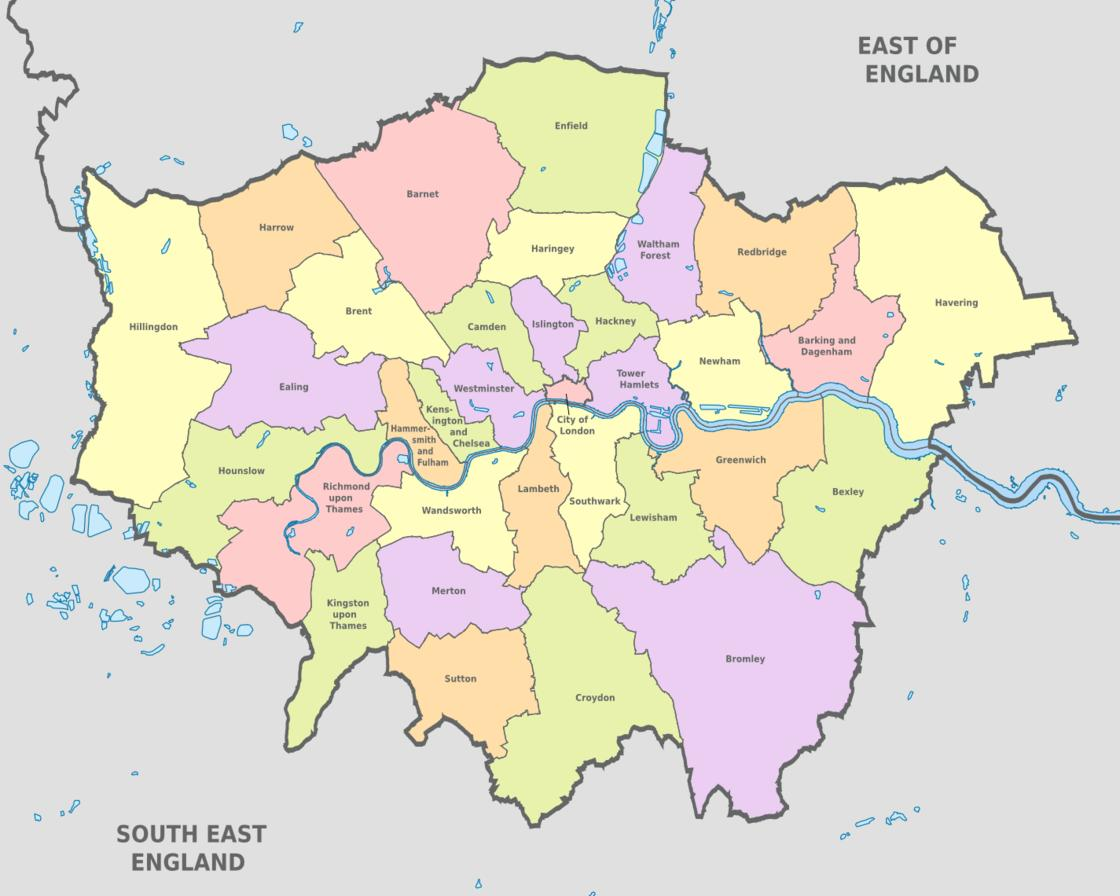

- Over 8 years, the areas with high number of jobs have stayed the same but the number of jobs in every borough has increased.
- Highest number of jobs seem to be in the city centre. For example, Westminster and City of London have the highest number of jobs while Barking and Dagenham is on the outskirts and has the lowest amount of jobs.

# Conclusions from the dataset
- High Number of jobs in the city centre
- High income boroughs are closer to city centre
- No real correlation between recycling and income in London
- Life satisfaction is genrally high 
- Mean Salary does not reflect life satisfaction
- Large range of population size between boroughs
